In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

Loading Data

In [ ]:
#loading data
from google.colab import files
data_to_load = files.upload()

Saving datalengkapbaru1.csv to datalengkapbaru1.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['datachurn.csv']))

Data Exploration

In [ ]:
#data exploration
dataset.info()

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

Pembersihan Data

In [ ]:
dataset.isnull().sum()

In [ ]:
#data cleaning
dataset = dataset.drop(dataset.columns[[0, 3, 4, 5, 6]], axis=1)

In [ ]:
#checking the median value for each class
(dataset['responsive_to']).where(dataset['churn_or_not']=='churn').median()

3.0

In [ ]:
dataset = dataset.drop(dataset[dataset.reliability_to > 5].index)
dataset = dataset.drop(dataset[dataset.reliability_to == 0].index)

dataset = dataset.drop(dataset[dataset.responsive_to > 5].index)
dataset = dataset.drop(dataset[dataset.responsive_to == 0].index)

dataset = dataset.drop(dataset[dataset.emphaty_to > 5].index)
dataset = dataset.drop(dataset[dataset.emphaty_to == 0].index)

dataset = dataset.drop(dataset[dataset.assurance_to > 5].index)
dataset = dataset.drop(dataset[dataset.assurance_to == 0].index)

dataset['tangibles_to'] = dataset['tangibles_to'].replace(['#DIV/0!'],0)
dataset.tangibles_to = pd.to_numeric(dataset.tangibles_to)
dataset = dataset.drop(dataset[dataset.tangibles_to > 5].index)
dataset = dataset.drop(dataset[dataset.tangibles_to == 0].index)

In [ ]:
dataset[['reliability_to','emphaty_to','assurance_to', 'responsive_to', 'tangibles_to']] = dataset[['reliability_to','emphaty_to','assurance_to', 'responsive_to', 'tangibles_to']].fillna((dataset[['reliability_to','emphaty_to','assurance_to', 'responsive_to', 'tangibles_to']].median()))

In [ ]:
dataset['duration'] = dataset['duration'].replace(['#VALUE!'],0)
dataset['duration'] = dataset['duration'].replace(0, np.nan)
dataset.duration = pd.to_numeric(dataset.duration)

In [ ]:
dataset['final_score'] = dataset['final_score'].replace(0, np.nan)

In [ ]:
dataset.dropna(subset=['churn_or_not','province', 'final_score','duration'], inplace = True)

In [ ]:
dataset.update(dataset[['finished_to','seeing_result','seeing_solution']].fillna(0))

In [ ]:
dataset = dataset.drop(dataset[dataset.duration > 3.45].index)
dataset = dataset.drop(dataset[dataset.duration == 0].index)

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = dataset[dataset.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

In [ ]:
dataset.info()

In [ ]:
def label_function(val):
    return f'{val / 100 * len(dataset):.0f}\n{val:.0f}%'

dataset['finished_to'].value_counts().plot(kind='pie', autopct=label_function, colors=['lime', 'tomato'])

In [ ]:
dataset['seeing_result'].value_counts().plot(kind='pie', autopct=label_function, colors=['lime', 'tomato'])

In [ ]:
dataset['seeing_solution'].value_counts().plot(kind='pie', autopct=label_function, colors=['lime', 'tomato'])

In [ ]:
dataset['fill_feedback'].value_counts().plot(kind='pie', autopct=label_function, colors=['lime', 'tomato'])

In [ ]:
#visualisasi proposi data churn dan tidak churn
print(dataset.churn_or_not.value_counts())
ax = dataset['churn_or_not'].value_counts().plot(kind='bar').set_title('churn or no')
plt.ylabel('Jumlah pelanggan')

In [ ]:
dataset.head()

,id_user,province,duration,finished_to,seeing_result,seeing_solution,fill_feedback,reliability_to,responsive_to,tangibles_to,emphaty_to,assurance_to,final_score,churn_or_not
357,1024636.0,RIAU,0.000034,0.0,0.0,0.0,0,4.0,3.0,4.0,4.0,5.0,256.20,churn
358,1693605.0,JAWA TIMUR,0.000034,0.0,0.0,0.0,0,4.0,3.0,4.0,4.0,5.0,44.90,churn
359,377828.0,JAWA TENGAH,0.000034,0.0,0.0,0.0,0,4.0,3.0,4.0,4.0,5.0,305.97,churn
360,1712582.0,SULAWESI SELATAN,0.000036,0.0,0.0,0.0,0,4.0,3.0,4.0,4.0,5.0,403.12,churn
361,1696709.0,JAWA BARAT,0.000036,0.0,0.0,0.0,0,4.0,3.0,4.0,4.0,5.0,365.17,churn


In [ ]:
dataset.describe()

In [ ]:
features = ['duration',
            'province_encoded',
            'finished_to',
            'seeing_result',
            'seeing_solution',
            'fill_feedback',
            'reliability_to',
            'responsive_to',
            'tangibles_to',
            'emphaty_to',
            'assurance_to',
            'final_score',
            'churn_or_not',
            ]

In [ ]:
#visualisasi korelasi antar kolom numeric
num_df = dataset[features]
plt.subplots(figsize=(12,12))
sns.heatmap(num_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, mask=np.triu(num_df.corr()), cmap='coolwarm')
plt.show()

In [ ]:
#visualisasi proposi churn dan tidak churn terhadap kolom bertipe kategorikal
categorical_features = [
    'finished_to',
    'seeing_result',
    'seeing_solution',
    'fill_feedback',
    'reliability_to',
    'responsive_to',
    'tangibles_to',
    'emphaty_to',
    'assurance_to'
]

target = 'churn_or_not'

In [ ]:
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
 if col == COLS - 1: row += 1
 col = i % COLS
 dataset[dataset.churn_or_not=='nochurn'][categorical_feature].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
 dataset[dataset.churn_or_not=='churn'][categorical_feature].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
 plt.legend(['No Churn', 'Churn'])
 fig.subplots_adjust(hspace=0.7)

Text(0, 0.5, 'Jumlah pengguna')

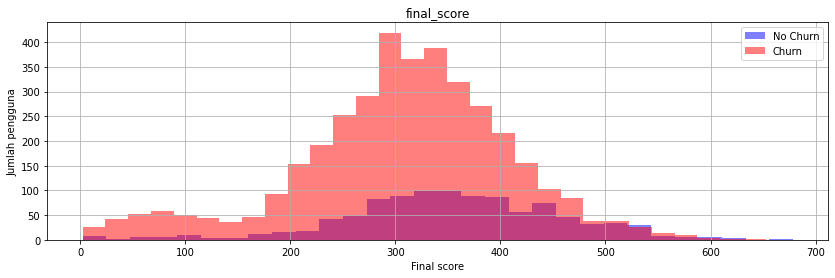

In [ ]:
#visualisasi feature final_score terhadap proposi pelanggan yang churn maupun tidak
feature1 = ['final_score']

fig, ax = plt.subplots(figsize=(14, 4))
dataset[dataset.churn_or_not=='nochurn'][feature1].hist(bins=30, color="blue", alpha=0.5, ax=ax)
dataset[dataset.churn_or_not=='churn'][feature1].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(['No Churn', 'Churn'])
plt.xlabel("Final score")
plt.ylabel("Jumlah pengguna")

Text(0, 0.5, 'Jumlah pengguna')

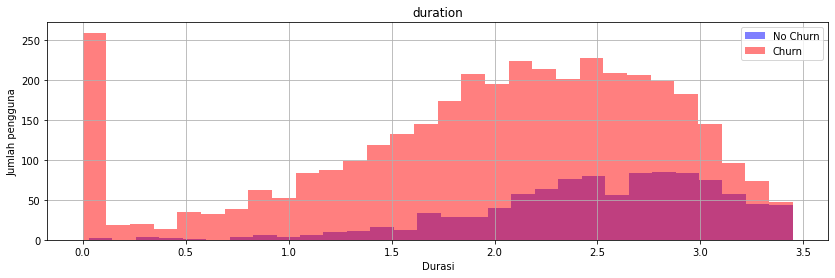

In [ ]:
#visualisasi feature duration terhadap proposi pelanggan yang churn maupun tidak
feature2 = ['duration']

fig, ax = plt.subplots(figsize=(14, 4))
dataset[dataset.churn_or_not=='nochurn'][feature2].hist(bins=30, color="blue", alpha=0.5, ax=ax)
dataset[dataset.churn_or_not=='churn'][feature2].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(['No Churn', 'Churn'])
plt.xlabel("Durasi")
plt.ylabel("Jumlah pengguna")

save dan load data untuk di undersampler manual (biar keliatan perbedaan visualisasinya)

In [ ]:
#save dan load data untuk di undersampler manual (biar keliatan perbedaan visualisasinya)
dataset.to_csv("forundersampling.csv")

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving file_namecobafix.csv to file_namecobafix.csv


In [ ]:
import io
dataset1 = pd.read_csv(io.BytesIO(data_to_load['file_namecobafix.csv']))

In [ ]:
#visualisasi korelasi antar kolom dari data yang sudah di undersampler
num_df = dataset1[features]
plt.subplots(figsize=(12,12))
sns.heatmap(num_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, mask=np.triu(num_df.corr()), cmap='coolwarm')
plt.show()

In [ ]:
#visualisasi proposi churn dan tidak churn terhadap kolom bertipe kategorikal pada data yang sudah di undersampler
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
 if col == COLS - 1: row += 1
 col = i % COLS
 dataset1[dataset1.churn_or_not=='nochurn'][categorical_feature].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
 dataset1[dataset1.churn_or_not=='churn'][categorical_feature].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
 plt.legend(['No Churn', 'Churn'])
 fig.subplots_adjust(hspace=0.7)

Text(0, 0.5, 'Jumlah pengguna')

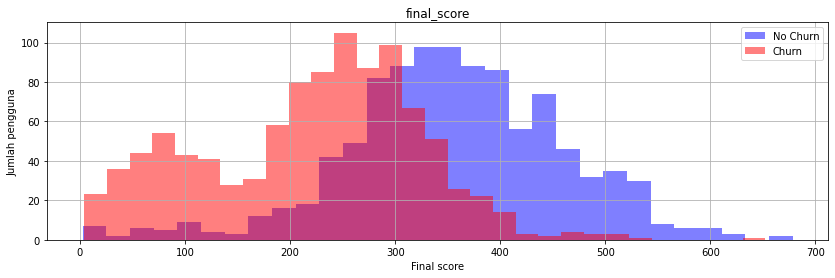

In [ ]:
#visualisasi feature final_score terhadap proposi pelanggan yang churn maupun tidak pada data yang sudah di undersampler
feature1 = ['final_score']

fig, ax = plt.subplots(figsize=(14, 4))
dataset1[dataset1.churn_or_not=='nochurn'][feature1].hist(bins=30, color="blue", alpha=0.5, ax=ax)
dataset1[dataset1.churn_or_not=='churn'][feature1].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(['No Churn', 'Churn'])
plt.xlabel("Final score")
plt.ylabel("Jumlah pengguna")

Text(0, 0.5, 'Jumlah pengguna')

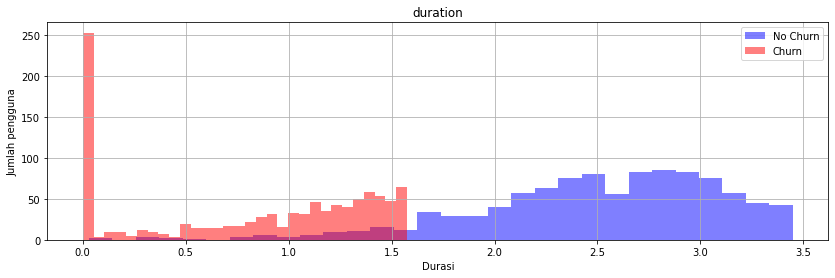

In [ ]:
#visualisasi feature duration terhadap proposi pelanggan yang churn maupun tidak pada data yang sudah di undersampler
feature2 = ['duration']

fig, ax = plt.subplots(figsize=(14, 4))
dataset1[dataset1.churn_or_not=='nochurn'][feature2].hist(bins=30, color="blue", alpha=0.5, ax=ax)
dataset1[dataset1.churn_or_not=='churn'][feature2].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(['No Churn', 'Churn'])
plt.xlabel("Durasi")
plt.ylabel("Jumlah pengguna")

# Data Preparation

Label Encoder Dataset

In [ ]:
#data preparation
#label encoder
from sklearn.preprocessing import LabelEncoder

dataset['province_encoded'] = LabelEncoder().fit_transform(dataset['province'])
dataset[['province', 'province_encoded']]

,province,province_encoded
357,RIAU,25
358,JAWA TIMUR,10
359,JAWA TENGAH,9
360,SULAWESI SELATAN,27
361,JAWA BARAT,8
...,...,...
9175,DKI JAKARTA,5
9178,SUMATERA UTARA,33
9180,JAWA TIMUR,10
9188,JAWA TENGAH,9


In [ ]:
#merubah kolom churn_or_not menjadi numerikal dengan mengganti label 0 dan 1 untuk churn dan tidak churn
dataset['churn_or_not'].replace({'nochurn':1,'churn':0},inplace=True)

In [ ]:
#membuang kolom region sebelum di label encoder pada data awal
dataset = dataset.drop(dataset.columns[[1]], axis=1)

In [ ]:
dataset.dtypes

id_user             float64
duration            float64
finished_to         float64
seeing_result       float64
seeing_solution     float64
fill_feedback         int64
reliability_to      float64
responsive_to       float64
tangibles_to        float64
emphaty_to          float64
assurance_to        float64
final_score         float64
churn_or_not          int64
province_encoded      int64
dtype: object

In [ ]:
cols_to_scale = ['duration','final_score', 'reliability_to', 'responsive_to', 'tangibles_to', 'emphaty_to', 'assurance_to', 'province_encoded']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])

In [ ]:
num_df = dataset.select_dtypes(['number'])
plt.subplots(figsize=(12,12))
sns.heatmap(num_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, mask=np.triu(num_df.corr()), cmap='coolwarm')
plt.show()

Label encoder data yang di undersampler manual

In [ ]:
#label encoder pada data yang telah di undersampler
from sklearn.preprocessing import LabelEncoder
dataset1['province_encoded'] = LabelEncoder().fit_transform(dataset1['province'])
dataset1[['province', 'province_encoded']]

,province,province_encoded
0,JAWA BARAT,8
1,JAWA TENGAH,9
2,JAWA TIMUR,10
3,JAWA TENGAH,9
4,JAWA BARAT,8
...,...,...
2017,JAWA TIMUR,10
2018,DKI JAKARTA,5
2019,JAWA TIMUR,10
2020,JAWA TENGAH,9


In [ ]:
#merubah kolom churn_or_not menjadi numerikal dengan mengganti label 0 dan 1 untuk churn dan tidak churn
dataset1['churn_or_not'].replace({'nochurn':1,'churn':0},inplace=True)

In [ ]:
#membuang kolom sebelum di label encoder pada data yang telah di undersampler
dataset1 = dataset1.drop(dataset1.columns[[0,2]], axis=1)

In [ ]:
dataset1.dtypes

id_user               int64
duration            float64
finished_to           int64
seeing_result         int64
seeing_solution       int64
fill_feedback         int64
reliability_to        int64
responsive_to         int64
tangibles_to          int64
emphaty_to            int64
assurance_to          int64
final_score         float64
churn_or_not          int64
province_encoded      int64
dtype: object

semua udah numeric yeyy

In [ ]:
dataset_utk_fi_rf12 = dataset[['final_score','id_user','duration','province_encoded','seeing_solution','seeing_result','churn_or_not']]

In [ ]:
dataset_utk_fi_rf3 = dataset1[['final_score','id_user','duration','province_encoded','seeing_solution','seeing_result','churn_or_not']]

In [ ]:
dataset_utk_fi_svm3 = dataset1[['duration', 'finished_to', 'seeing_result', 'seeing_solution', 'fill_feedback', 'emphaty_to', 'reliability_to', 'assurance_to', 'churn_or_not']]

**Split data**

1. Splitting 80 20

In [ ]:
#splitting data pada data awal dengan pembagian 80 training 20 testing
X = dataset.drop('churn_or_not',axis='columns')
y = dataset['churn_or_not']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

2. Oversampler dengan SMOTETomek

In [ ]:
X_train.shape

(3843, 13)

In [ ]:
X_test.shape

(961, 13)

In [ ]:
print("Banyaknya data yang di train untuk pelanggan yang stayed: {}".format(sum(y_train==1)))
print("Banyaknya data yang di train untuk pelanggan yang churned: {} \n".format(sum(y_train==0)))

Banyaknya data yang di train untuk pelanggan yang stayed: 809
Banyaknya data yang di train untuk pelanggan yang churned: 3034 



In [ ]:
#splitting data dengan di oversampling menggunakan metode smote tomek
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train_smote, y_train_smote = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test_smote, y_test_smote = smk.fit_sample(X_test, y_test)

In [ ]:
X_train_smote.shape

(5000, 13)

In [ ]:
X_test_smote.shape

(1188, 13)

In [ ]:
print("Banyaknya data yang di train untuk pelanggan yang stayed dengan oversampling: {}".format(sum(y_train_smote==1)))
print("Banyaknya data yang di train untuk pelanggan yang churned dengan oversampling: {} \n".format(sum(y_train_smote==0)))

Banyaknya data yang di train untuk pelanggan yang stayed dengan oversampling: 2500
Banyaknya data yang di train untuk pelanggan yang churned dengan oversampling: 2500 



3. Undersampler manual 80 20

In [ ]:
#splitting data pada data yang telah di undersampler dengan 80 training dan 20 testing
X1 = dataset1.drop('churn_or_not',axis='columns')
y1 = dataset1['churn_or_not']

from sklearn.model_selection import train_test_split
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(X1,y1,test_size=0.2,random_state=0, stratify = y1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_manual = sc.fit_transform(X_train_manual)
X_test_manual = sc.transform(X_test_manual)

In [ ]:
print("Banyaknya data yang di train untuk pelanggan yang stayed dengan balancing manual: {}".format(sum(y_train_manual==1)))
print("Banyaknya data yang di train untuk pelanggan yang churned dengan balancing manual: {} \n".format(sum(y_train_manual==0)))

Banyaknya data yang di train untuk pelanggan yang stayed dengan balancing manual: 809
Banyaknya data yang di train untuk pelanggan yang churned dengan balancing manual: 808 



defining kfold

In [ ]:
#mendefinisikan stratified kfold validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Modeling

**RF**

In [ ]:
#PEMODELAN
#Random forest
#import library random forest
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier

Pemodelan awal (using undersampler dataset)

In [ ]:
#untuk metode splitting (3)
rf3 = RandomForestClassifier(n_estimators=20,
                              random_state=0)
rf3.fit(X_train_manual, y_train_manual) 
score = rf3.score(X_train_manual, y_train_manual)
score2 = rf3.score(X_test_manual, y_test_manual)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

In [ ]:
y_pred_manual = rf3.predict(X_test_manual)
print(confusion_matrix(y_test_manual,y_pred_manual))
print(classification_report(y_test_manual,y_pred_manual))
print(accuracy_score(y_test_manual, y_pred_manual))

measuring hyperparameter tuning (grid  search)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning, (rf3 is the changing var)
from sklearn.metrics import make_scorer
scoring = {'acc': make_scorer(accuracy_score), 'prec': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score), 'roc': make_scorer(roc_auc_score)}
estimators = [i for i in range(5,101,10)]
depth = [i for i in range(10, 21, 2)]
samples = [i for i in range(1, 11, 1)]
parameter = dict(max_depth=depth, n_estimators=estimators, min_samples_leaf=samples)

rf_model = rf3.fit(X_train_manual, y_train_manual)
param_search_rf = GridSearchCV(rf_model, parameter, scoring=scoring, refit='roc')
param_search_rf.fit(X_test_manual, y_test_manual)
param_search_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 85}

imputasi output dari hyperparameter tuning

In [ ]:
#untuk metode splitting (1)
rfoptz = RandomForestClassifier(n_estimators=55,
                                max_depth=20,
                                min_samples_leaf=1,
                              random_state=0)
rfoptz.fit(X_train, y_train) 
score = rfoptz.score(X_train, y_train)
score2 = rfoptz.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.963
Test set accuracy:  0.796


In [ ]:
y_pred = rfoptz.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[726  33]
 [163  39]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       759
           1       0.54      0.19      0.28       202

    accuracy                           0.80       961
   macro avg       0.68      0.57      0.58       961
weighted avg       0.76      0.80      0.76       961

0.7960457856399584


In [ ]:
#untuk metode splitting (2)
rfoptz2 = RandomForestClassifier(n_estimators=95,
                                max_depth=20,
                                min_samples_leaf=1,
                              random_state=0)
rfoptz2.fit(X_train_smote, y_train_smote) 
score = rfoptz2.score(X_train_smote, y_train_smote)
score2 = rfoptz2.score(X_test_smote, y_test_smote)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.993
Test set accuracy:  0.732


In [ ]:
y_pred = rfoptz2.predict(X_test_smote)
print(confusion_matrix(y_test_smote,y_pred))
print(classification_report(y_test_smote,y_pred))
print(accuracy_score(y_test_smote, y_pred))

[[481 127]
 [147 461]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       608
           1       0.78      0.76      0.77       608

    accuracy                           0.77      1216
   macro avg       0.77      0.77      0.77      1216
weighted avg       0.77      0.77      0.77      1216

0.774671052631579


In [ ]:
#untuk metode splitting (3)
rfoptz3c = RandomForestClassifier(n_estimators=28,
                                min_samples_leaf=1,
                              random_state=0)
rfoptz3c.fit(X_train_manual, y_train_manual) 
score = rfoptz3c.score(X_train_manual, y_train_manual)
score2 = rfoptz3c.score(X_test_manual, y_test_manual)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.999
Test set accuracy:  0.970


In [ ]:
y_pred_manual = rfoptz3c.predict(X_test_manual)
print(confusion_matrix(y_test_manual,y_pred_manual))
print(classification_report(y_test_manual,y_pred_manual))
print(accuracy_score(y_test_manual, y_pred_manual))

[[202   1]
 [ 11 191]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       203
           1       0.99      0.95      0.97       202

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

0.9703703703703703


In [ ]:
#untuk metode splitting (3)
rfoptz3 = RandomForestClassifier(n_estimators=85,
                                max_depth=10,
                                min_samples_leaf=1,
                              random_state=0)
rfoptz3.fit(X_train_manual, y_train_manual) 
score = rfoptz3.score(X_train_manual, y_train_manual)
score2 = rfoptz3.score(X_test_manual, y_test_manual)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.972
Test set accuracy:  0.973


In [ ]:
y_pred_manual = rfoptz3.predict(X_test_manual)
print(confusion_matrix(y_test_manual,y_pred_manual))
print(classification_report(y_test_manual,y_pred_manual))
print(accuracy_score(y_test_manual, y_pred_manual))

[[203   0]
 [ 11 191]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       203
           1       1.00      0.95      0.97       202

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

0.9728395061728395


In [ ]:
#measuring feature importance
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
11,final_score,0.277975
0,id_user,0.276075
1,duration,0.270710
12,province_encoded,0.091353
4,seeing_solution,0.031189
3,seeing_result,0.021240
2,finished_to,0.007154
7,responsive_to,0.006571
5,fill_feedback,0.005537
6,reliability_to,0.005063


validasi dengan Stratified KFold

In [ ]:
#untuk metode splitting (3)
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfoptz3, X1, y1, scoring='accuracy',cv=kfold, n_jobs=-1)
score

array([0.97044335, 0.96059113, 0.97524752, 0.95049505, 0.97524752,
       0.95544554, 0.95544554, 0.95544554, 0.97524752, 0.97524752])

In [ ]:
score.mean()

0.9648856264936839

--------